# Network
Working with NetworkX and Gephi

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
import collections

### Network Types

* Undirected networks

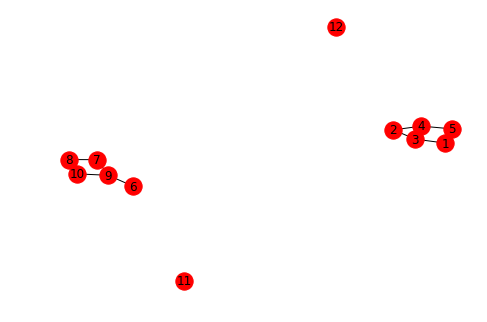

In [2]:
# Making graph
G = nx.Graph()

# Adding the nodes
G.add_node(1)
G.add_nodes_from([2,3,4,5])
G.add_node(6)
G.add_nodes_from([7,8,9,10])
G.add_node(11)
G.add_node(12)

# Adding the edges
G.add_edge(1,3)
G.add_edge(*(1,5))
G.add_edges_from([(2,4), (4,5), (3,4), (10,9), (2,3)])
G.add_edges_from([(7,9), (7,8), (8,10), (6,9)])

# Visualization
nx.draw(G, with_labels=True)
# nx.draw_kamada_kawai(G, with_labels=True)
# nx.draw_networkx(G, with_labels=True)
# nx.draw_random(G, with_labels=True)
# nx.draw_shell(G, with_labels=True)
# nx.draw_spectral(G, with_labels=True)
# nx.draw_spring(G, with_labels=True)
plt.show()

* Network with attribute

In [3]:
# Node attribute
G =nx.Graph()
G.add_edges_from([(1,2),(1,3),(2,3),(4,5),(5,6),(7,8),(3,6),(4,8)])
# G.nodes is the method to associate an attribute to an existing node 
for i in G.nodes:
    if i%2 == 0:
        G.nodes[i]["colour"] = "Red"
    else:
        G.nodes[i]["colour"] = "Blue"
    G.nodes[i]["name"] = f'Node {i}'

G.add_node(9,colour="Yellow")
G.nodes.data()

NodeDataView({1: {'colour': 'Blue', 'name': 'Node 1'}, 2: {'colour': 'Red', 'name': 'Node 2'}, 3: {'colour': 'Blue', 'name': 'Node 3'}, 4: {'colour': 'Red', 'name': 'Node 4'}, 5: {'colour': 'Blue', 'name': 'Node 5'}, 6: {'colour': 'Red', 'name': 'Node 6'}, 7: {'colour': 'Blue', 'name': 'Node 7'}, 8: {'colour': 'Red', 'name': 'Node 8'}, 9: {'colour': 'Yellow'}})

In [4]:
# Edge attribute
G =nx.Graph()
G.add_edges_from([(u,random.randint(1,11),{"weight": random.uniform(1,10), "colour":random.choice(["Red", "Blue"])}) for u in  range(1,10)])
G.edges.data()

EdgeDataView([(1, 9, {'weight': 3.9348329012957137, 'colour': 'Red'}), (1, 4, {'weight': 8.134692076381352, 'colour': 'Red'}), (1, 5, {'weight': 9.152889162326813, 'colour': 'Blue'}), (9, 3, {'weight': 7.822768349248358, 'colour': 'Red'}), (9, 2, {'weight': 6.77019191922523, 'colour': 'Blue'}), (2, 8, {'weight': 6.137420882466546, 'colour': 'Red'}), (8, 5, {'weight': 8.508387040393384, 'colour': 'Blue'}), (5, 6, {'weight': 1.7878074055111326, 'colour': 'Blue'}), (7, 10, {'weight': 1.9779236912107696, 'colour': 'Blue'})])

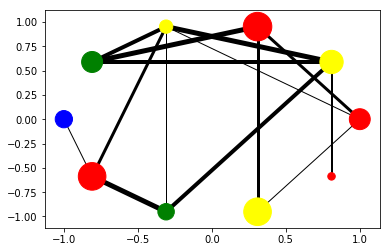

In [5]:
# Visualization based on attributes
# Here, we added size & colour to the nodes and weight to the edges
G = nx.generators.random_graphs.fast_gnp_random_graph(10,0.25)
edgeWeights = [random.randint(1,5) for i in range(10)]
nodeSize = [random.randint(1,1000) for i in range(10)]
nodeColour = [random.choice(["r","b", "green", "yellow"]) for i in range(10)]


pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=nodeSize, node_color=nodeColour)
nx.draw_networkx_edges(G, pos, width=edgeWeights)
plt.show()

* Directed networks

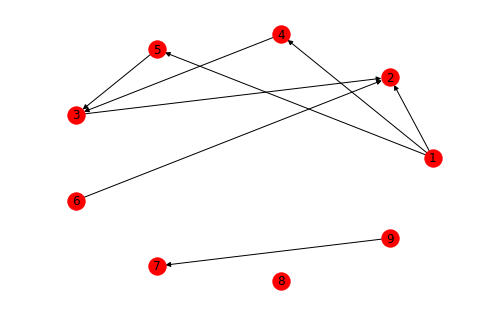

In [6]:
DG = nx.DiGraph()
DG.add_edge(1,2)
DG.add_edges_from([(1,4),(1,5),(5,3)])
DG.add_edge(3,2)
DG.add_edges_from([(4,3),(6,2)])
DG.add_nodes_from([7,8,9])
DG.add_edge(9,7)
nx.draw_circular(DG, with_labels=True)
plt.show()

So far, we reviewed three important types of networks (i) undirected, (ii) weighted and (iii) directed networks. Also, we saw how networks with different properties can be visualized. In the next step, we look at some metrics in networks. But before that, as a conclusion to this part (without looking at the answer) try to solve challenge 1

### Challenge 1
Make a random directed graph with 50 nodes and give a random weight from 1 to 10 to each edge. Then visualize the graph regarding two following conditions:
1- The size of the nodes should be associated with the nodes degree
2- The thickness of each edge should be associted with edge weights
3- The colour of nodes has to be associated with their degree in a way that as the degree of a node increases the colour of that node becomes more sharp
3- The colour of edges has to be associated with their weights in a way that as the weight of an edge increases the colour of that edge becomes more sharp

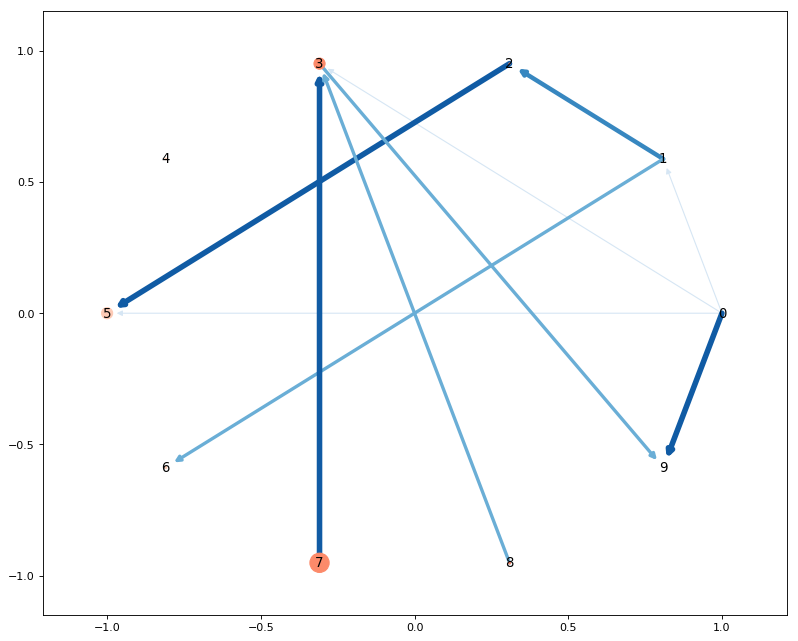

In [7]:
G = nx.erdos_renyi_graph(10, 0.1, directed=True)
inDeg = dict(G.in_degree())
outDeg = dict(G.out_degree())
for edge in G.edges:
    G[edge[0]][edge[1]]["weight"] = random.randint(1,5)
edgeWeights = [u[2]["weight"] for u in G.edges.data()]

# Making the colour palette and linking it the edges according to theor weights
colourPalette = sns.color_palette("Blues",5)
edgeWeighColour = dict(zip(range(1,6),colourPalette))
for edge in G.edges:
    G[edge[0]][edge[1]]["colour"] = edgeWeighColour[G[edge[0]][edge[1]]["weight"]]
edgeColours = [u[2]["colour"] for u in G.edges.data()]   

# Associating the color of the nodes with the their out-degree
outDegUnique = np.unique([i for i in outDeg.values()])
colourPalette = sns.color_palette("Reds",len(outDegUnique))
nodeOutDegDict = dict(zip(outDegUnique,colourPalette))
for i in G.nodes:
    G.nodes[i]["colour"] = nodeOutDegDict[outDeg[i]]
nodeColour = [i[1]["colour"] for i in G.nodes.data()]
    
# This line makes the figure bigger
plt.figure(num=None, figsize=(12, 10), dpi=80)

# Setting the layout, nodes, edges and lables
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=[(u,100*inDeg[u]) for u in inDeg], node_color=nodeColour)
nx.draw_networkx_edges(G, pos, width=edgeWeights, edge_color=edgeColours)
nx.draw_networkx_labels(G, pos)

# Drawing the network
plt.show()

### Visualization

### Node metrics

* Degrees and degree distribution

In [25]:
# Since then, we work with existing networks. In this part we work with US power network

In [32]:
# Loading the network and making the graph
zacharyAdr = "D:/PhD/TAs/Network Science Workshop/Dataset/ucidata-zachary/out.ucidata-zachary"
zacharyNetworkEdges = [tuple(a.strip().split(" ")) for a in open(zacharyAdr).readlines()[2:]]
G = nx.Graph()
G.add_edges_from(zacharyNetworkEdges)

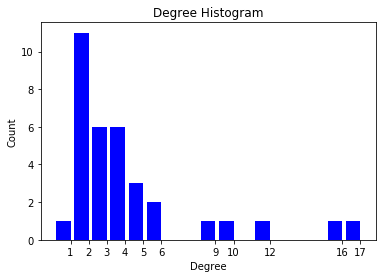

In [33]:
# Degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

* Centrality Measures

In [34]:
# Degree centrality
# C(i) ~ k(i) (centrality of node i changes by degree of that node)
# Based on degree centrality, the more connection a node has, the more important that node is. Airport, citation and friendship are the cases that degree centrality works well
degreeCentrality = nx.degree_centrality(G)

In [35]:
# Closeness centrality
# This measure is calculated via C = 1/L(i) which L(i) denotes the average distance of node i to all the others. Collaboration networks is a case that closeness centrality works well 
# Closeness centrality doesn't span much
# Check Erdos-number and Bacon-number
closenessCentrality = nx.closeness_centrality(G)

In [36]:
# Betweenness centrality
# C(i) ~ # shortest paths between all pairs passing through node i
# Very large span for large networks
betweennessCentrality = nx.betweenness_centrality(G)

In [37]:
# Eigenvector centrality
# The philosophy underneath this centrality measure: Important nodes are connected to important nodes
# Eigen vector centrality is a recursive approach
eigenvectorCentrality = nx.eigenvector_centrality(G)

In [38]:
# Katz centrality
katzCentrality = nx.katz_centrality(G)

In [39]:
# Page Rank centrality
pagerankCentrality = nx.pagerank(G)

### Challenge 2
Compute the correlation between the introduced centrality measures over three datasets

* Community and Homophily

In [41]:
# The functions in this class are not imported into the top-level networkx namespace. You can access these functions by importing the networkx.algorithms.community module, then accessing the functions as attributes of community
# This class implemented Newman-Girvan method
# The other very popular community detection method is the Blondel method which is implemented in Gephi
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
communities = sorted(map(sorted, next_level_communities))

* Paths and geodesics

In [70]:
# In calculating the shortest path between nodes in a graph, a very important point is to know whether the graph is connected or disconnected. If it's a connected graph there is no problem, otherwise in disconnected graph, the shortest path algorithm should applied on the connected components
condition = nx.is_connected(G)
sourceNode = "1"
targetNode = "30"
if condition:
    print(nx.shortest_path_length(G, source=sourceNode, target=targetNode))
    print(nx.shortest_path(G, source=sourceNode, target=targetNode))
    print(list(nx.shortest_paths.all_shortest_paths(G, source=sourceNode, target=targetNode)))
    # A simple path is a path with no repeated nodes
    simplePaths = list(nx.simple_paths.all_simple_paths(G, source=sourceNode, target=targetNode))

3
['1', '3', '33', '30']
[['1', '3', '33', '30'], ['1', '9', '33', '30'], ['1', '32', '33', '30'], ['1', '9', '34', '30'], ['1', '14', '34', '30'], ['1', '20', '34', '30'], ['1', '32', '34', '30']]


* Bipartite networks and their projections

### Erdos-Renyi random graphs

### Small world networks

### Epidemiology

### Bipartite Graph

### Assortivity

### Robustness

### K-Core

### Cliques

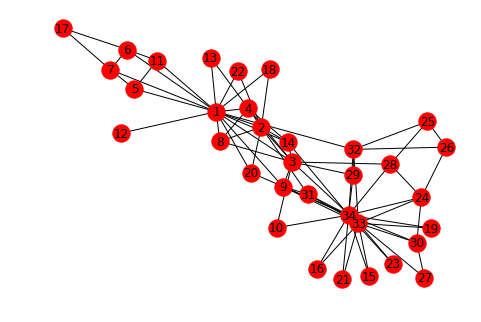

In [95]:
nx.draw(G, with_labels=True)
plt.show()

In [110]:
# The idea of a clique is relatively simple. At the most general level, a clique is a sub-set of a network in which the actors
# are more closely and intensely tied to one another than they are to other members of the network. In terms of friendship ties, 
# for example, it is not unusual for people in human groups to form "cliques" on the basis of age, gender, race, ethnicity, 
# religion/ideology, and many other things. The smallest "cliques" are composed of two actors: the dyad. But dyads can be 
# "extended" to become more and more inclusive -- forming strong or closely connected regions in graphs. A number of approaches 
# to finding groups in graphs can be developed by extending the close-coupling of dyads to larger structures. 
# The formal definition of a "clique" as it is used in network analysis is much more narrow and precise than the general 
# notion of a high local density.  Formally, a clique is the maximum number of actors who have all possible ties present
# among themselves.
# Further explanation: http://www.faculty.ucr.edu/~hanneman/nettext/C11_Cliques.html#subgraph
# In networkx, finding the largest clique in a graph is NP-complete problem, so most of the algorithms have an exponential running time

# The following function returns all the cliques (with different size) of a graph in an array 
allCliques = nx.enumerate_all_cliques(G)
# list(allCliques)

# The following function returns the clique number of the graph. The clique number of a graph is the size of the largest clique in the graph.
cliqueNum = nx.graph_clique_number(G)
# cliqueNum

#The following function returns maximal clique of a graph. For each node v, a maximal clique for v is a largest complete subgraph containing v. The largest maximal clique is sometimes called the maximum clique.
maximalCliques = nx.find_cliques(G)
# list(maximalCliques)

#The following function returns the number of maximal cliques in the graph.
maximalCliquesNum = nx.graph_number_of_cliques(G)

# The following function returns the number of maximal cliques for each node.
nodeMaximalClique = nx.number_of_cliques(G)


In [112]:
list(maximalCliques)

[['1', '7', '6'],
 ['1', '7', '5'],
 ['1', '11', '6'],
 ['1', '11', '5'],
 ['1', '9', '3'],
 ['1', '2', '3', '4', '8'],
 ['1', '2', '3', '4', '14'],
 ['1', '2', '22'],
 ['1', '2', '20'],
 ['1', '2', '18'],
 ['1', '12'],
 ['1', '32'],
 ['1', '13', '4'],
 ['7', '17', '6'],
 ['2', '31'],
 ['3', '33', '9'],
 ['3', '10'],
 ['3', '28'],
 ['3', '29'],
 ['26', '24'],
 ['26', '25', '32'],
 ['25', '28'],
 ['34', '27', '30'],
 ['34', '29', '32'],
 ['34', '10'],
 ['34', '20'],
 ['34', '28', '24'],
 ['34', '33', '9', '31'],
 ['34', '33', '15'],
 ['34', '33', '16'],
 ['34', '33', '21'],
 ['34', '33', '30', '24'],
 ['34', '33', '32'],
 ['34', '33', '23'],
 ['34', '33', '19'],
 ['34', '14']]

In [113]:
nodeMaximalClique

{'1': 13,
 '10': 2,
 '11': 2,
 '12': 1,
 '13': 1,
 '14': 2,
 '15': 1,
 '16': 1,
 '17': 1,
 '18': 1,
 '19': 1,
 '2': 6,
 '20': 2,
 '21': 1,
 '22': 1,
 '23': 1,
 '24': 3,
 '25': 2,
 '26': 2,
 '27': 1,
 '28': 3,
 '29': 2,
 '3': 7,
 '30': 2,
 '31': 2,
 '32': 4,
 '33': 9,
 '34': 14,
 '4': 3,
 '5': 2,
 '6': 3,
 '7': 3,
 '8': 1,
 '9': 3}

### Online Social Network

There are quite a few online social networks outside; however, we decided to work with Twitter network becasue (i) Despite its limitation (collecting data only from past seven days and getting only 1% of available data), Twitter is one of the few social networks that allows data collection, (ii) also, it's one of the most dynamic social networks which almost every social, political and economic topic will be reflected in it. 

In order to get data from Twitter, first you need to make a developer account. To do that you have to go this website https://apps.twitter.com/ and create an application (filling the form and explaining for what application you need to get Twitter API). After filling the form, go the the "Keys and Access Tokesn" and take four following codes: API Key, API Secret, Access Token, Access Token Secret.

In [73]:
API_Key = ""
API_Secret = ""
Access_Token = ""
Access_Token_Secret = ""

In [75]:
import tweepy

# Connecting to Twitter
auth = tweepy.auth.OAuthHandler()
auth.set_access_token()
api = tweepy.API(auth)

# tweetObject = api.get_status(tweet.split("\t")[1], tweet_mode="extended")

TypeError: __init__() missing 2 required positional arguments: 'consumer_key' and 'consumer_secret'